In [1]:
import math
import numpy as np
from numpy.random import seed
import random
import pandas as pd

import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight

import tensorflow as tf
import tensorflow.keras.utils as Utils
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras import utils as np_utils

2025-06-09 20:22:38.001472: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-09 20:22:38.097567: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-09 20:22:38.867121: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-09 20:22:38.872242: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-09 20:22:40.218247: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# Para reproduzir resultados em todas as execuções
# Seed Everything to reproduce results for future use cases
def seed_everything(seed=42):
    # Seed value for TensorFlow
    tf.random.set_seed(seed)
    
    # Seed value for NumPy
    np.random.seed(seed)
    
    # Seed value for Python's random library
    random.seed(seed)
    
    # Force TensorFlow to use single thread
    # Multiple threads are a potential source of non-reproducible results.
    session_conf = tf.compat.v1.ConfigProto(
        intra_op_parallelism_threads=1,
        inter_op_parallelism_threads=1
    )

    # Make sure that TensorFlow uses a deterministic operation wherever possible
    tf.compat.v1.set_random_seed(seed)

    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

seed_everything()

In [3]:
#importar funções
from global_functions import *

## Configurar e carregar imagens para treino dos modelos

In [4]:
#Treinar apenas as emoções presentes em todos os datasets (treino e teste)
emotions_labels = {0:'raiva',  1:'medo', 2:'alegria', 3: 'tristeza'}
class_names = ['raiva', 'medo', 'alegria', 'tristeza']

In [5]:
img_width = 224
img_height = 224
img_depth = 3
num_classes = len(class_names)
print('Classes:' + str(num_classes))

Classes:4


In [6]:
#emotions_labels = {0:'raiva', 1:'aversão', 2:'medo', 3:'alegria', 4: 'tristeza', 5: 'surpresa', 6: 'desprezo'}
#imagens lidas a partir dos diretórios <dataset>_<emotion>, por exemplo, NIMH_Angry (emotion:[Angry, Happy, Sad, Fear])
#imagens RECORTADAS lidas a partir dos diretórios <dataset>_<emotion>_cropped, por exemplo, NIMH_Angry (emotion:[Angry, Happy, Sad, Fear])

#Substituir DATASET por um dos datasets (CK, DEFSS, DEFSS18, FACES, NIMH, MUG)
DATASET = 'NIMH'
filesStru = getFiles(dataset=DATASET, crop=True, extensao='jpg')

files = filesStru.files
files_class = filesStru.files_class

Raiva: 52
Medo: 52
Alegria: 52
Tristeza: 51
Total imagens: 207
Total classes: 207


In [7]:
#quantidade de imagens por emoção
data = {'imagem': files, 'emocao': files_class}
df = pd.DataFrame(data)
df['emocao'].value_counts().sort_index(ascending=True)

0    52
1    52
2    52
3    51
Name: emocao, dtype: int64

In [8]:
#percentagem de imagens por emoção
df['emocao'].value_counts(normalize=True, ascending=False) #.sort_index(ascending=True)

0    0.251208
1    0.251208
2    0.251208
3    0.246377
Name: emocao, dtype: float64

<AxesSubplot:>

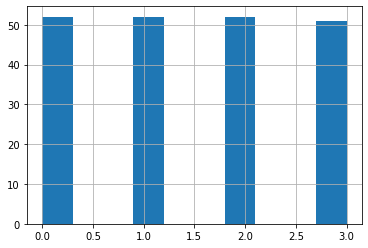

In [9]:
df['emocao'].hist()

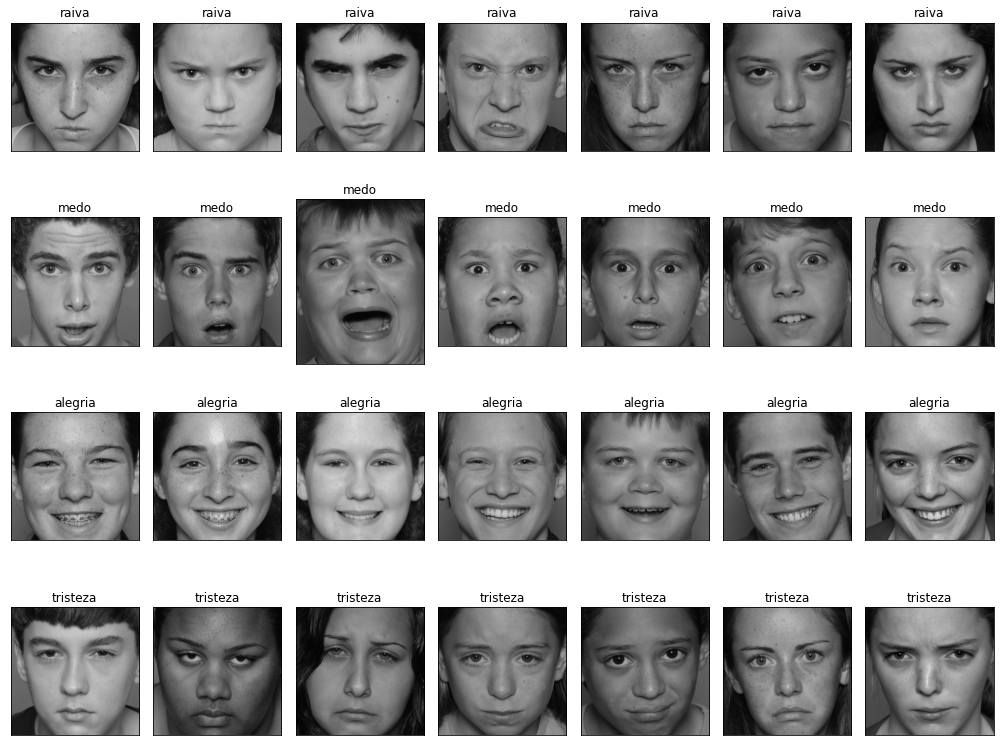

In [10]:
#Exibição de algumas das imagens após tratadas
some_images(files, files_class, emotions_labels)

In [11]:
#all_images(files, files_class, emotions_labels)

In [12]:
img_features_source = []
img_features_source = create_features(files, img_width, img_height)

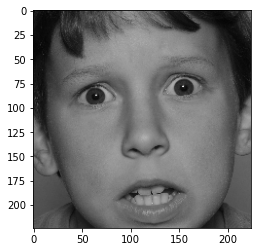

In [13]:
#Exibir uma imagem do img_features
pyplot.imshow(img_features_source[93].astype(np.uint8));

In [14]:
img_labels = np_utils.to_categorical(files_class,num_classes)
img_labels.shape

(207, 4)

## Dividir dados em Treino (treino e validação) e teste 

In [17]:
## Dividir os dados em treino e validação
X_train, X_test, y_train, y_test = train_test_split(img_features_source, img_labels, shuffle = True, 
                                                      stratify = img_labels, test_size = 0.20, random_state = 42)

X_train, X_valid, y_train, y_valid  = train_test_split(X_train, y_train, shuffle = True, 
                       test_size = 0.25, random_state = 42)
                       
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape
        
np.save('X_train_' + DATASET + '.npy', X_train) #salvar dados treino
np.save('Y_train_' + DATASET + '.npy', y_train) 

np.save('X_valid_' + DATASET + '.npy', X_train) #salvar dados de validação
np.save('Y_valid_' + DATASET + '.npy', y_train) 

np.save('X_test_' + DATASET + '.npy', X_test) #salvar dados teste 
np.save('Y_test_' + DATASET + '.npy', y_test) 

print(X_train.shape, X_test.shape, X_valid.shape)

(123, 224, 224, 3) (42, 224, 224, 3) (42, 224, 224, 3)


In [ ]:
yhat = test_model('ResNet152V2', 'm1', DATASET, modelTrained, X_test, y_test, emotions_labels)

### ResNet152V2 - M2

In [ ]:
model = createModel('ResNet152V2', img_height, img_width, modelType='m2', num_classes=4)

In [ ]:
 modelTrained = compileAndTrain('ResNet152V2', 'm2', DATASET, model, train_generator, valid_generator, 
                                X_train, class_weights) 

In [ ]:
yhat = test_model('ResNet152V2', 'm2', DATASET, modelTrained, X_test, y_test, emotions_labels)

### VGG16 - M1

In [ ]:
model = createModel('VGG16', img_height, img_width, modelType='m1', num_classes=4)

In [ ]:
 modelTrained = compileAndTrain('VGG16', 'm1', DATASET, model, train_generator, valid_generator, 
                                X_train, class_weights) 

In [ ]:
yhat = test_model('VGG16', 'm1', DATASET, modelTrained, X_test, y_test, emotions_labels)

### VGG16 - M2

In [ ]:
model = createModel('VGG16', img_height, img_width, modelType='m2', num_classes=4)

In [ ]:
 modelTrained = compileAndTrain('VGG16', 'm2', DATASET, model, train_generator, valid_generator, 
                                X_train, class_weights) 

In [ ]:
yhat = test_model('VGG16', 'm2', DATASET, modelTrained, X_test, y_test, emotions_labels)